In [1]:
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


### Get the data

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

### Normalize and flatten the 28x28 images into vectors of size 784

In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


# Basic AutoEncoder

In [4]:
encoding_dim = 32 
input_img = Input(shape=(x_train.shape[1], ))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(x_train.shape[1], activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
autoencoder.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


### Encoder  Model

In [5]:
encoder_model = Model(input_img, encoded)
encoder_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


### Decoder Model

In [6]:
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

decoder_model = Model(encoded_input, decoder_layer(encoded_input))
decoder_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________


### Compiling autoencode

In [7]:
autoencoder.compile(optimizer='adam', loss = 'binary_crossentropy')

### Train autoencoder

In [8]:
autoencoder.fit(x = x_train, y = x_train, 
                epochs=50, 
                batch_size=256, 
                validation_data=(x_test, x_test), 
                shuffle=True, 
                verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 2s - loss: 0.2766 - val_loss: 0.1893
Epoch 2/50
 - 1s - loss: 0.1708 - val_loss: 0.1533
Epoch 3/50
 - 1s - loss: 0.1441 - val_loss: 0.1335
Epoch 4/50
 - 1s - loss: 0.1286 - val_loss: 0.1215
Epoch 5/50
 - 1s - loss: 0.1186 - val_loss: 0.1133
Epoch 6/50
 - 1s - loss: 0.1116 - val_loss: 0.1074
Epoch 7/50
 - 1s - loss: 0.1065 - val_loss: 0.1031
Epoch 8/50
 - 1s - loss: 0.1027 - val_loss: 0.0998
Epoch 9/50
 - 1s - loss: 0.0999 - val_loss: 0.0974
Epoch 10/50
 - 1s - loss: 0.0978 - val_loss: 0.0957
Epoch 11/50
 - 1s - loss: 0.0964 - val_loss: 0.0946
Epoch 12/50
 - 1s - loss: 0.0955 - val_loss: 0.0939
Epoch 13/50
 - 1s - loss: 0.0949 - val_loss: 0.0934
Epoch 14/50
 - 1s - loss: 0.0945 - val_loss: 0.0931
Epoch 15/50
 - 1s - loss: 0.0942 - val_loss: 0.0928
Epoch 16/50
 - 1s - loss: 0.0940 - val_loss: 0.0927
Epoch 17/50
 - 1s - loss: 0.0938 - val_loss: 0.0924
Epoch 18/50
 - 1s - loss: 0.0937 - val_loss: 0.0923
Epoch 19/50
 - 1s - los

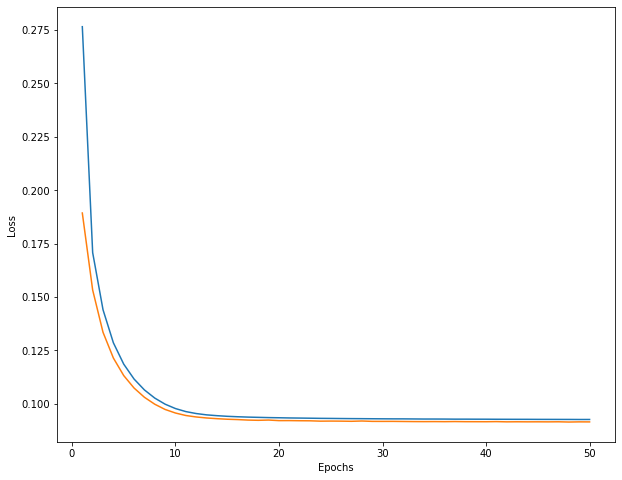

In [9]:
epochs = 50
plt.figure(figsize=(10, 8))
plt.plot(np.arange(1, epochs + 1), autoencoder.history.history['loss'])
plt.plot(np.arange(1, epochs + 1), autoencoder.history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### Plot the encoded and decoded image

In [10]:
encoded_imgs = encoder_model.predict(x_test)
decoded_imgs = decoder_model.predict(encoded_imgs)

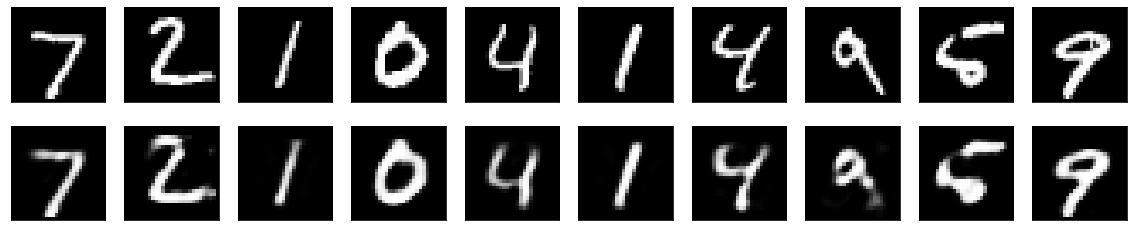

In [11]:
n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Adding more layers to basic autoencoder

In [12]:
input_img = Input(shape=(x_train.shape[1],))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(x_train.shape[1], activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_8 (Dense)              (None, 784)               1011

In [13]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 41us/step - loss: 0.2468 - val_loss: 0.1676
Epoch 2/100
60000/60000 [==============================] - 2s 37us/step - loss: 0.1489 - val_loss: 0.1347
Epoch 3/100
60000/60000 [==============================] - 2s 36us/step - loss: 0.1307 - val_loss: 0.1252
Epoch 4/100
60000/60000 [==============================] - 2s 37us/step - loss: 0.1222 - val_loss: 0.1167
Epoch 5/100
60000/60000 [==============================] - 2s 38us/step - loss: 0.1148 - val_loss: 0.1106
Epoch 6/100
60000/60000 [==============================] - 2s 37us/step - loss: 0.1098 - val_loss: 0.1063
Epoch 7/100
60000/60000 [==============================] - 2s 37us/step - loss: 0.1064 - val_loss: 0.1035
Epoch 8/100
60000/60000 [==============================] - 2s 38us/step - loss: 0.1038 - val_loss: 0.1014
Epoch 9/100
60000/60000 [==============================] - 2s 37us/step - loss: 0.1016 - val_loss: 0.0

60000/60000 [==============================] - 2s 37us/step - loss: 0.0828 - val_loss: 0.0826
Epoch 78/100
60000/60000 [==============================] - 2s 37us/step - loss: 0.0827 - val_loss: 0.0825
Epoch 79/100
60000/60000 [==============================] - 2s 37us/step - loss: 0.0828 - val_loss: 0.0825
Epoch 80/100
60000/60000 [==============================] - 2s 37us/step - loss: 0.0827 - val_loss: 0.0823
Epoch 81/100
60000/60000 [==============================] - 2s 36us/step - loss: 0.0827 - val_loss: 0.0824
Epoch 82/100
60000/60000 [==============================] - 2s 37us/step - loss: 0.0826 - val_loss: 0.0822
Epoch 83/100
60000/60000 [==============================] - 2s 38us/step - loss: 0.0826 - val_loss: 0.0823
Epoch 84/100
60000/60000 [==============================] - 2s 36us/step - loss: 0.0825 - val_loss: 0.0826
Epoch 85/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.0825 - val_loss: 0.0822
Epoch 86/100
60000/60000 [========================

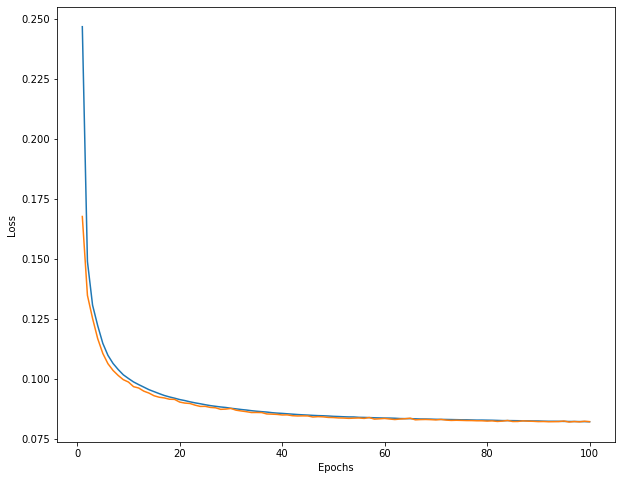

In [14]:
epochs = 100
plt.figure(figsize=(10, 8))
plt.plot(np.arange(1, epochs + 1), autoencoder.history.history['loss'])
plt.plot(np.arange(1, epochs + 1), autoencoder.history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [15]:
decoded_imgs = autoencoder.predict(x_test)

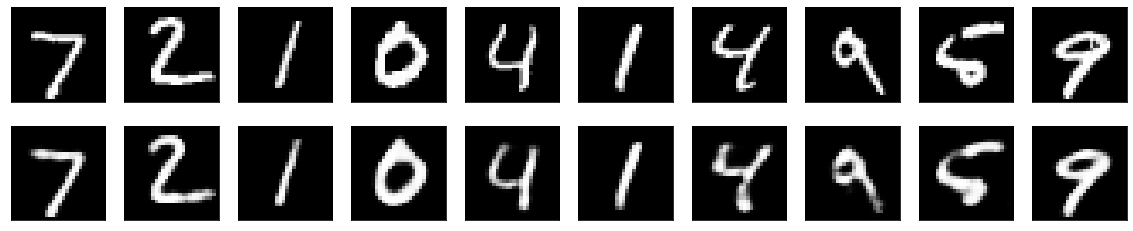

In [16]:
n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

So increasing the depth, results in better reconstruction of original image by the auto encoder